<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/time_series_analysis/p_value_in_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
#seasonal data
df1 = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

#non-seasonal data
df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

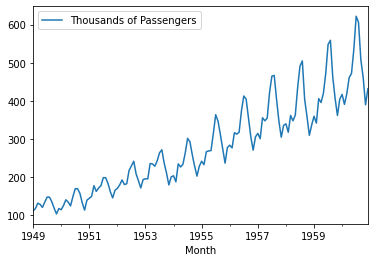

In [6]:
df1.plot()

In [7]:
from statsmodels.tsa.stattools import adfuller  

In [8]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [9]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [14]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','Lags used','Observations'])

In [15]:
dfout

ADF test statistic      0.815369
p-value                 0.991880
Lags used              13.000000
Observations          130.000000
dtype: float64

In [16]:
for key, val in dftest[4].items():
  dfout[f'critical value ({key})'] = val

In [13]:
dfout  

ADF test statistic        0.815369
p-value                   0.991880
Lags used                13.000000
Observations            130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [18]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):

  print(f'Augmented Dickey-Fuller Test: {title}')
  result = adfuller(series.dropna(),autolag='AIC') # incase data has missing values

  labels = ['ADF test statistic','p-value','Lags used','Observations']
  out = pd.Series(result[0:4],index=labels)

  for key,val in result[4].items():
    out[f'critical value ({key})'] = val

  print(out.to_string()) # incase dtype:float64

  if result[1] <= 0.05:
    print('Strong evidence againgst null hypothesis')
    print('reject the null hypothesis')
    print('data has no unit root and is staionary')
  else:
    print('week evidence againgst null hypothesis')
    print('Fail to reject the null hypothesis')
    print('data has a unit root and is non-staionary')

In [19]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
Lags used                13.000000
Observations            130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
week evidence againgst null hypothesis
Fail to reject the null hypothesis
data has a unit root and is non-staionary


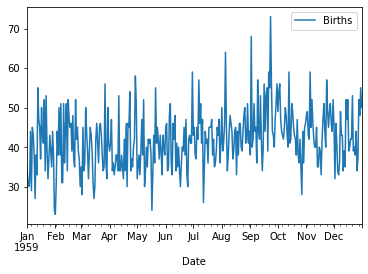

In [20]:
df2.plot()

In [21]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
Lags used                 6.000000
Observations            358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence againgst null hypothesis
reject the null hypothesis
data has no unit root and is staionary


In [24]:
df3 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df3.index.freq = 'MS'

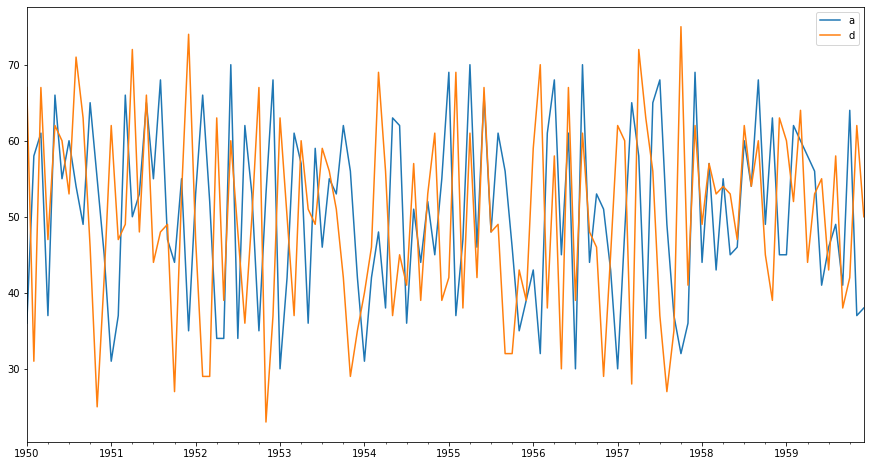

In [28]:
df3[['a','d']].plot(figsize=(15,8))

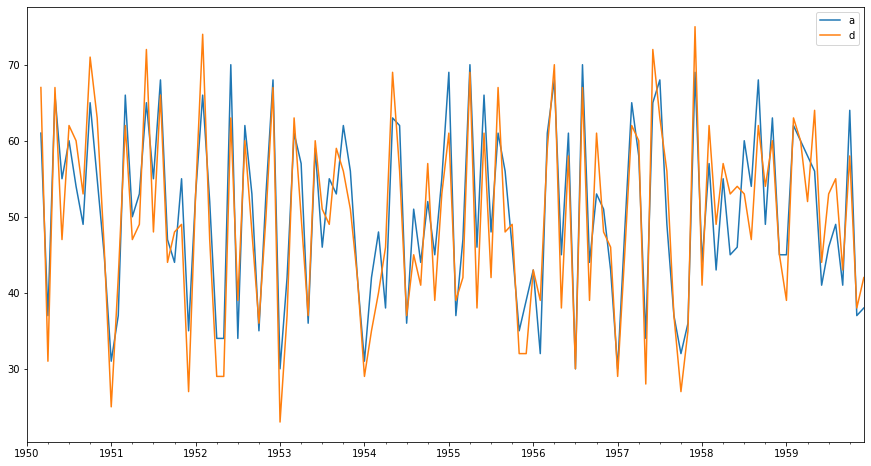

In [30]:
df3['a'].iloc[2:].plot(figsize=(15,8),legend=True)
df3['d'].shift(2).plot(legend=True)

In [31]:
from statsmodels.tsa.stattools import grangercausalitytests

In [34]:
grangercausalitytests(df3[['a','d']],maxlag=3); # we are looking for extremely low p-values


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [36]:
grangercausalitytests(df3[['b','d']],maxlag=3); # we are looking for extremely low p-values


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
